# Fronteira eficiente:

tickets: 'PETR4', 'BPAC3', 'SMTO3', 'JBSAY', 'VALE3', 'CEGR3'

In [1]:
# Load Packages
import numpy as np
import pandas as pd
#from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('dados.xlsx') # Baixar a planilha dados na mesma pasta que estiver salvo o programa 

In [ ]:
df.drop(columns = ['TASA4'], inplace = True)

In [5]:
df.columns

Index(['PETR4', 'BPAC3', 'SMTO3', 'JBSAY', 'VALE3', 'CEGR3'], dtype='object')

In [8]:
cov_matrix = df.cov()
corr_matrix = df.corr()

In [9]:
# Yearly returns for individual companies
ind_er = df.mean()
ind_er
media = ind_er.copy()
media = media.to_frame()
media.rename( columns = {0: 'retorno médio'}, inplace=True)
media[' '] = '%'
media['retorno médio'] = media['retorno médio'].round(5)*100
media


,retorno médio,
PETR4,0.086,%
BPAC3,0.047,%
SMTO3,0.077,%
JBSAY,0.085,%
VALE3,0.018,%
CEGR3,0.040,%


In [10]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.std().apply(lambda x: x*np.sqrt(250))
ann_sd
var = ann_sd.copy()
var = var.to_frame()
var.rename( columns = {0: 'Volatilidade'}, inplace=True)
var[' '] = '%'
var['Volatilidade'] = var['Volatilidade'].round(4)*100
var['Retorno Médio'] = media['retorno médio']
var['  '] = media[' ']
var

,Volatilidade,,Retorno Médio,
PETR4,14.93,%,0.086,%
BPAC3,21.71,%,0.047,%
SMTO3,14.30,%,0.077,%
JBSAY,17.47,%,0.085,%
VALE3,15.52,%,0.018,%
CEGR3,14.72,%,0.040,%


In [11]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Retorno', 'Volatilidade']
assets.sort_values('Retorno')

,Retorno,Volatilidade
VALE3,0.000180,0.155165
CEGR3,0.000401,0.147176
BPAC3,0.000475,0.217078
SMTO3,0.000768,0.143017
JBSAY,0.000853,0.174675
PETR4,0.000861,0.149328


In [12]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 50000

In [13]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [14]:
data = {'Retorno':p_ret, 'Volatilidade':p_vol}

In [15]:
for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [24]:
dado = data

In [30]:
portfolios  = pd.DataFrame(dado)
portfolios.tail(3) #Portfólio com 50.000 carteiras  

,Retorno,Volatilidade,PETR4 weight,BPAC3 weight,SMTO3 weight,JBSAY weight,VALE3 weight,CEGR3 weight
49997,0.000521,0.095145,0.245473,0.250538,0.116094,0.022650,0.290179,0.075066
49998,0.000526,0.089070,0.218148,0.284906,0.084845,0.029386,0.183663,0.199053
49999,0.000712,0.088526,0.206704,0.202972,0.291798,0.219820,0.026645,0.052060


In [61]:
a = portfolios.head(3)

a['n'] = a.index
b = portfolios.tail(3)
b['n'] = b.index
c = pd.merge(a,b, how = 'outer')
d = c.loc[ :, ['n','Retorno', 'Volatilidade', 'PETR4 weight', 'BPAC3 weight','SMTO3 weight', 'JBSAY weight', 'VALE3 weight', 'CEGR3 weight']]

<ipython-input-61-9ac295d380bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['n'] = a.index
<ipython-input-61-9ac295d380bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['n'] = b.index


In [62]:
d.transpose()

,0,1,2,3,4,5
n,0.000000,1.000000,2.000000,49997.000000,49998.000000,49999.000000
Retorno,0.000569,0.000536,0.000501,0.000521,0.000526,0.000712
Volatilidade,0.080076,0.086749,0.074074,0.095145,0.089070,0.088526
PETR4 weight,0.075752,0.222596,0.009029,0.245473,0.218148,0.206704
BPAC3 weight,0.074416,0.234360,0.113282,0.250538,0.284906,0.202972
SMTO3 weight,0.149682,0.106581,0.161286,0.116094,0.084845,0.291798
JBSAY weight,0.300892,0.071151,0.193699,0.022650,0.029386,0.219820
VALE3 weight,0.284209,0.251195,0.266205,0.290179,0.183663,0.026645
CEGR3 weight,0.115049,0.114118,0.256499,0.075066,0.199053,0.052060


<AxesSubplot:xlabel='Volatilidade', ylabel='Retorno'>

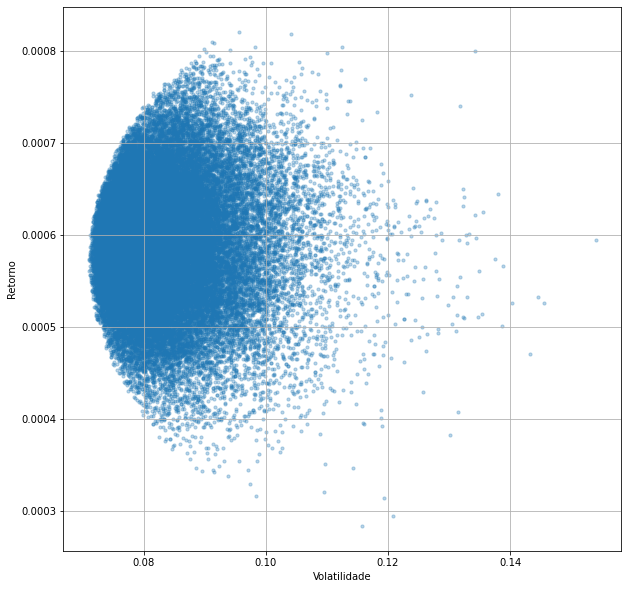

In [17]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatilidade', y='Retorno', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [18]:
min_vol_port = portfolios.iloc[portfolios['Volatilidade'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Retorno         0.000572
Volatilidade    0.071021
PETR4 weight    0.138771
BPAC3 weight    0.108933
SMTO3 weight    0.130522
JBSAY weight    0.187620
VALE3 weight    0.149689
CEGR3 weight    0.284465
Name: 18249, dtype: float64

In [20]:
portfolios

,Retorno,Volatilidade,PETR4 weight,BPAC3 weight,SMTO3 weight,JBSAY weight,VALE3 weight,CEGR3 weight
0,0.000569,0.080076,0.075752,0.074416,0.149682,0.300892,0.284209,0.115049
1,0.000536,0.086749,0.222596,0.234360,0.106581,0.071151,0.251195,0.114118
2,0.000501,0.074074,0.009029,0.113282,0.161286,0.193699,0.266205,0.256499
3,0.000601,0.077064,0.008795,0.143242,0.208456,0.273794,0.067536,0.298177
4,0.000579,0.085909,0.083244,0.311996,0.147711,0.168774,0.063409,0.224866
...,...,...,...,...,...,...,...,...
49995,0.000600,0.071671,0.154891,0.130466,0.145250,0.209654,0.136629,0.223110
49996,0.000572,0.084382,0.206919,0.229858,0.184735,0.029384,0.102511,0.246593
49997,0.000521,0.095145,0.245473,0.250538,0.116094,0.022650,0.290179,0.075066
49998,0.000526,0.089070,0.218148,0.284906,0.084845,0.029386,0.183663,0.199053


In [21]:
# Finding the optimal portfolio
rf = 0.0005 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Retorno']-rf)/portfolios['Volatilidade']).idxmax()]
a = optimal_risky_port
optimal_risky_port.round(5)

Retorno         0.00081
Volatilidade    0.09127
PETR4 weight    0.39760
BPAC3 weight    0.05019
SMTO3 weight    0.22285
JBSAY weight    0.31145
VALE3 weight    0.00154
CEGR3 weight    0.01637
Name: 19908, dtype: float64

In [22]:
# Passar optimal_risky_port para uma planilha excel
#writer = pd.ExcelWriter('Pasta1.xlsx', engine = 'xlsxwriter')
#a.to_excel(writer, sheet_name = '123')
#writer.save()
#writer.close()

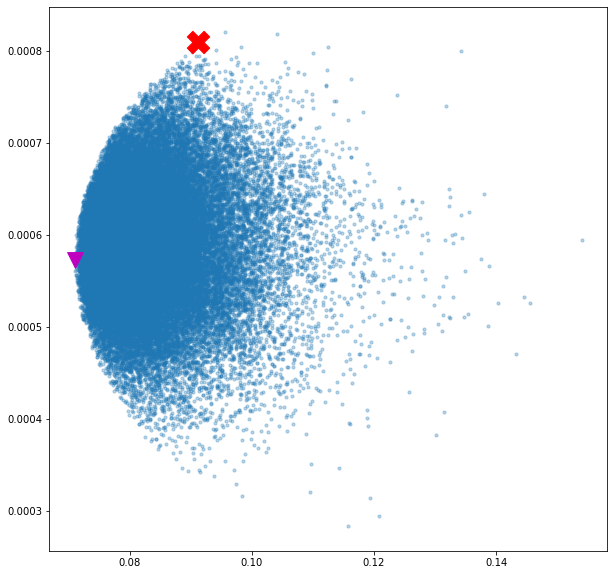

In [23]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatilidade'], portfolios['Retorno'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='v', s=250)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='r', marker='X', s=500)